In [3]:
import ast
import pandas as pd
import numpy as np
encoding = 'ISO-8859-1'
def excel_to_df(df,city):
    print(city)
    # Initialize an empty DataFrame for the results
    city_df = pd.DataFrame()

    # Iterate through each row in the DataFrame
    for i in df.index:
        # Parse all columns in the row once
        col1_data = ast.literal_eval((df.loc[i].values)[0])
        col2_data = ast.literal_eval((df.loc[i].values)[1])
        col3_data = ast.literal_eval((df.loc[i].values)[2])
        col4_data = ast.literal_eval((df.loc[i].values)[3])
        col5_data = (df.loc[i].values)[4]  # No need to parse as it's not JSON

        # Process col1
        for key, value in col1_data.items():
            city_df.loc[i, key] = str(value) if key == "trendingText" else value

        # Process col2
        if "top" in col2_data:
            for item in col2_data["top"]:
                city_df.loc[i, item['key']] = item['value']

        # Process col3
        if "heading" in col3_data:
            colheader = col3_data["heading"]

        if "top" in col3_data:
            rowvaluestop = [v['value'] for v in col3_data["top"]]
            city_df.loc[i, colheader] = str(rowvaluestop)

        if "data" in col3_data:
            for data_item in col3_data["data"]:
                colheader = data_item["heading"]
                rowvaluesdata = [item['value'] for item in data_item["list"]]
                city_df.loc[i, colheader] = str(rowvaluesdata)

        # Process col4
        if "top" in col4_data:
            for item in col4_data["top"]:
                city_df.loc[i, item['key']] = item['value']

        if "data" in col4_data:
            for data_item in col4_data["data"]:
                for k in data_item["list"]:
                    city_df.loc[i, k['key']] = k['value']

        # Process col5 and static assignment
        city_df.loc[i, "Car_link"] = col5_data
        city_df.loc[i, "City"] = city
        
    return city_df
blore_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\bangalore_cars.xlsx")
blore_df=excel_to_df(blore_df,"Bangalore")
chennai_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\chennai_cars.xlsx")
chennai_df=excel_to_df(chennai_df,"Chennai")
delhi_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\delhi_cars.xlsx")
delhi_df=excel_to_df(delhi_df,"Delhi")
hyderabad_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\hyderabad_cars.xlsx")
hyderabad_df=excel_to_df(hyderabad_df,"Hyderabad")
jaipur_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\jaipur_cars.xlsx")
jaipur_df=excel_to_df(jaipur_df,"Jaipur")
kolkata_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\kolkata_cars.xlsx")
kolkata_df=excel_to_df(kolkata_df,"Kolkata")
final_df=pd.concat([blore_df,chennai_df,delhi_df,hyderabad_df,jaipur_df,kolkata_df],axis=0)
final_df.to_excel("final_df.xlsx", index=False)

Bangalore
Chennai
Delhi
Hyderabad
Jaipur
Kolkata


In [4]:
#data preprocessing
import pandas as pd
import re
import numpy as np 
final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\final_df.xlsx")
columns=['Power Steering','Anti Lock Braking System','Air Conditioner','Adjustable Head Lights','Centeral Locking','Child Safety Locks','Cd Player','Radio','Speakers Front','Speakers Rear','Integrated2Din Audio','Usb Auxiliary Input','Bluetooth','Number Of Speaker','Touch Screen']

def replace_string(value, string):
    if isinstance(value,str):
        return int(value.replace(string, ""))
    return np.nan
def measurements(value, string):
    if isinstance(value,str):
        return int(value.replace(string, "").replace(",","").replace("-","")[0])
    return np.nan
def weights(value):
    if isinstance(value,str):
        match= re.findall(r"\d+", value)[0]
        return float(match)
    return np.nan
def max_power_bhp(value):
    ps_to_bhp = 0.986  # 1 PS = 0.986 bhp

    # Remove commas from numeric values
    value = re.sub(r',', '', str(value))

    # Regular expression to match numeric values and units (bhp, PS, hp)
    match = re.search(r"(\d+(\.\d+)?)\s*(bhp|PS|hp)?(?:\s*@\s*\d+\s*\(?\s*(bhp|PS|hp)\s*\)?)?", value, re.IGNORECASE)
    if match:
        # Extract power value and unit
        power_value = float(match.group(1))
        unit = match.group(3) or match.group(4)
        
        # Convert PS to bhp if needed
        if unit and unit.upper() == 'PS':
            power_value *= ps_to_bhp
        
        return float(power_value)
    
    return np.nan


def price(value):
    value=str(value)
    if pd.isna(value) or not value.strip():
        return 0
    value = value.replace('₹', '').replace(',', '').strip()
    if "Lakh" in value:
        #Regular expression to match numerical values and units(lakh or crore)
        return float(re.findall(r"\d+\.?\d*", value)[0])
    elif "Crore" in value:
        #Returning price in lakhs by converting from crores to lakhs
        return float(re.findall(r"\d+\.?\d*", value)[0]) * 100
    else:
        numbers = re.findall(r"\d+\.?\d*", value)
        if numbers:
            return float(numbers[0]) / 100000
        return np.nan
def Features(value):
    #Defining dataframe
    features_df = pd.DataFrame(False, index=range(len(value)), columns=columns)
    #Making array of values into single different columns
    for j, i in enumerate(value):
        if i == "[]" or pd.isna(i):
            continue  # Keep the row with all zeros
        else:
            for feature in columns:
                if feature in i:
                    #If particular feature exists in the car then it sets to boolean value True
                    features_df.loc[j, feature] = True
    
    return features_df
def Top_speed(value):
    #Checking for null value
    if pd.isna(value) or not value.strip():
        return np.nan
    if isinstance(value,str):
        #Regualar expression to extract numerical value from a string
        match= re.findall(r"\d+\.?\d*", value)[0]
        return float(match)
def year_of_manufacture(value):
    #If null returns numpy nan otherwise value
    if value=="" or value=="NaN" or pd.isna(value):
        return np.nan
    return int(value)
def extract_gearbox_speeds(value):
    # Find the first occurrence of a digit in the string
    value=str(value)
    #Regular expression to search for numerical value in a string
    match = re.search(r'\d+', value)
    if match:
        #Extracts first occurence of digits and converting into integer.
        return int(match.group(0))
    return np.nan  # or return a default value like 0 if needed

#Extracting numerical values and boolean values from string
final_df["km"]=final_df["km"].apply(lambda x:replace_string(x,","))
final_df["price"]=final_df["price"].apply(price)
final_df["Engine Displacement"]=final_df["Engine Displacement"].apply(lambda x:replace_string(x,"cc"))
final_df["Mileage"]=final_df["Mileage"].apply(Top_speed)
final_df["Max Power"]=final_df["Max Power"].apply(max_power_bhp)
final_df["Torque"]=final_df["Torque"].apply(Top_speed)
final_df["Length"]=final_df["Length"].apply(lambda x:measurements(x,"mm"))
final_df["Width"]=final_df["Width"].apply(lambda x:measurements(x,"mm"))
final_df["Height"]=final_df["Height"].apply(lambda x:measurements(x,"mm"))
final_df["Wheel Base"]=final_df["Wheel Base"].apply(lambda x:measurements(x,"mm"))
final_df["Front Tread"]=final_df["Front Tread"].apply(lambda x:measurements(x,"mm"))
final_df["Rear Tread"]=final_df["Rear Tread"].apply(lambda x:measurements(x,"mm"))
final_df["Gross Weight"]=final_df["Gross Weight"].apply(weights)
final_df["Top Speed"]=final_df["Top Speed"].apply(Top_speed)
final_df["Acceleration"]=final_df["Acceleration"].apply(Top_speed)
final_df["Year of Manufacture"]=final_df["Year of Manufacture"].apply(year_of_manufacture)
final_df['Gear Box'] = final_df['Gear Box'].apply(extract_gearbox_speeds)
feature_df=Features(final_df["Features"])
final_df=pd.concat([final_df,feature_df],axis=1)
final_df["Power Steering"]=final_df["Power Steering"].astype(int)
final_df["Anti Lock Braking System"]=final_df["Anti Lock Braking System"].astype(int)
final_df["Air Conditioner"]=final_df["Air Conditioner"].astype(int)
final_df["Adjustable Head Lights"]=final_df["Adjustable Head Lights"].astype(int)
final_df["Centeral Locking"]=final_df["Centeral Locking"].astype(int)
final_df["Child Safety Locks"]=final_df["Child Safety Locks"].astype(int)
final_df["Cd Player"]=final_df["Cd Player"].astype(int)
final_df["Radio"]=final_df["Radio"].astype(int)
final_df["Speakers Front"]=final_df["Speakers Front"].astype(int)
final_df["Speakers Rear"]=final_df["Speakers Rear"].astype(int)
final_df["Integrated2Din Audio"]=final_df["Integrated2Din Audio"].astype(int)
final_df["Usb Auxiliary Input"]=final_df["Usb Auxiliary Input"].astype(int)
final_df["Bluetooth"]=final_df["Bluetooth"].astype(int)
final_df["Number Of Speaker"]=final_df["Number Of Speaker"].astype(int)
final_df["Touch Screen"]=final_df["Touch Screen"].astype(int)

#Dropping the columns
final_df=final_df.drop(["it","owner","centralVariantId","priceActual","priceSaving","priceFixedText","trendingText"],axis=1)
final_df=final_df.drop(["Insurance Validity","Fuel Type","Seats","RTO","Ownership","Registration Year","Features","transmission"],axis=1)
final_df=final_df.drop(["Comfort & Convenience","Interior","Exterior","Safety","Color","Values per Cylinder"],axis=1)
final_df=final_df.drop(["Value Configuration","Fuel Suppy System","BoreX Stroke","Compression Ratio","Length","Width","Height"],axis=1)
final_df=final_df.drop(["Wheel Base","Front Tread","Rear Tread","Kerb Weight","Steering Type","variantName"],axis=1)
final_df=final_df.drop(["Turning Radius","Tyre Type","No Door Numbers","Cargo Volumn","Entertainment & Communication"],axis=1)
final_df=final_df.drop(["Wheel Size","Alloy Wheel Size","Ground Clearance Unladen","Car_link","Max Torque","Kms Driven","Engine"],axis=1)
#final_df.to_excel("after_null.xlsx", index=False)

# for i in final_df.index:
#     for j,column in zip(final_df.loc[i].values,final_df.columns):
#         print(j,type(j),column)   
#     break
    
print(final_df.iloc[1])

ft                                        Petrol
bt                                           SUV
km                                         32706
ownerNo                                        2
oem                                         Ford
model                              Ford Ecosport
modelYear                                   2018
price                                       8.11
Engine Displacement                       1497.0
Transmission                              Manual
Year of Manufacture                       2018.0
Mileage                                     17.0
Max Power                                 121.31
Torque                                     150.0
Engine Type                 Ti-VCT Petrol Engine
Displacement                              1497.0
No of Cylinder                               3.0
Turbo Charger                                 No
Super Charger                                 No
Gross Weight                              1660.0
Gear Box            

In [5]:
#Finding null values
nullvalues=final_df.isnull().sum()
#Filling nan values with mode and mean values
final_df['bt'] = final_df.groupby('model')['bt'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.ffill())
)
final_df['Engine Type'].fillna(final_df['Engine Type'].mode()[0], inplace=True)
final_df['Displacement'].fillna(final_df['Displacement'].mean(), inplace=True)
final_df['No of Cylinder'].fillna(final_df['No of Cylinder'].mean(), inplace=True)
final_df['No of Cylinder'].fillna(final_df['No of Cylinder'].mean(), inplace=True)
final_df["Turbo Charger"].fillna(final_df["Turbo Charger"].mode()[0],inplace=True)
final_df["Super Charger"].fillna(final_df["Super Charger"].mode()[0],inplace=True)
final_df["Gear Box"].fillna((final_df["Gear Box"].mean()).astype(int),inplace=True)
#final_df["Gear Box"]=final_df["Gear Box"].astype(int)
final_df["Max Power"].fillna(final_df["Max Power"].mean(),inplace=True)
final_df["Mileage"].fillna(final_df["Mileage"].mean(),inplace=True)
final_df["Seating Capacity"].fillna(final_df["Seating Capacity"].mean(),inplace=True)
#final_df["Max Power"]=final_df["Max Power"].astype(int)
final_df["Drive Type"].fillna(final_df["Drive Type"].mode()[0],inplace=True)
final_df["Front Brake Type"].fillna(final_df["Front Brake Type"].mode()[0],inplace=True)
final_df["Rear Brake Type"].fillna(final_df["Rear Brake Type"].mode()[0],inplace=True)
final_df['ownerNo'] = final_df['ownerNo'].replace(0, 1)
final_df=final_df.dropna()#dropping only one row
#Exporting dataframe to excel sheet
final_df.to_excel("after_null.xlsx", index=False)
print(final_df.isnull().sum())

ft                          0
bt                          0
km                          0
ownerNo                     0
oem                         0
model                       0
modelYear                   0
price                       0
Engine Displacement         0
Transmission                0
Year of Manufacture         0
Mileage                     0
Max Power                   0
Torque                      0
Engine Type                 0
Displacement                0
No of Cylinder              0
Turbo Charger               0
Super Charger               0
Gross Weight                0
Gear Box                    0
Drive Type                  0
Seating Capacity            0
Front Brake Type            0
Rear Brake Type             0
Top Speed                   0
Acceleration                0
City                        0
Power Steering              0
Anti Lock Braking System    0
Air Conditioner             0
Adjustable Head Lights      0
Centeral Locking            0
Child Safe

In [6]:
%%writefile smartchoice.py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import streamlit as st
import pandas as pd
from PIL import Image
import base64
#Reading data from excel sheet to data frame
final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
#Identifying numerical columns
after_null=pd.DataFrame()
#Dropping the columns which are not dependent on target column
after_null=final_df.drop(['Engine Displacement','Year of Manufacture','Torque','Super Charger','Turbo Charger', 
                          'model','No of Cylinder', 'Centeral Locking','Engine Type','Drive Type',
                          'Displacement','Gross Weight', 'Gear Box', 'Top Speed','Front Brake Type','Rear Brake Type',
                          'Acceleration', 'Power Steering','Anti Lock Braking System','Air Conditioner','Adjustable Head Lights',
                          'Child Safety Locks','Cd Player','Radio','Speakers Front','Speakers Rear','Integrated2Din Audio', 
                          'Usb Auxiliary Input','Bluetooth', 'Number Of Speaker', 'Touch Screen'],axis=1)

#Filtering all numerical columns
numerical_columns = after_null.select_dtypes(include=['number']).columns
#Finding out categorical columns 
categorical_columns=after_null.columns.difference(numerical_columns)

#Standardization
after_null['km_sta']=(after_null['km']-after_null['km'].mean())/after_null["km"].std()
after_null['Mileage_sta']=(after_null['Mileage']-after_null['Mileage'].mean())/after_null["Mileage"].std()
after_null['MaxPower_sta']=(after_null['Max Power']-after_null['Max Power'].mean())/after_null["Max Power"].std()
after_null = after_null[
    (after_null['km_sta'] > -1) & 
    (after_null['km_sta'] < 1) &
    (after_null['Mileage_sta'] > -1) & 
    (after_null['Mileage_sta'] < 1) &
    (after_null['MaxPower_sta'] > -1) & 
    (after_null['MaxPower_sta'] < 1)
]

#One-Hot Encoding
city_dummies=pd.get_dummies(after_null['City'])
bt_dummies=pd.get_dummies(after_null['bt'])
ft_dummies=pd.get_dummies(after_null['ft'])
oem_dummies=pd.get_dummies(after_null['oem'])
Transmission_dummies=pd.get_dummies(after_null['Transmission'])

#after_null=pd.concat([after_null,encoding_df],axis=1)
#Dropping main columns after encoding
after_null=after_null.drop(['City', 'Transmission', 'bt', 'ft', 'oem','Mileage', 'Max Power','km'],axis=1)
#Concating all the dataframes
after_null=pd.concat([after_null,city_dummies,bt_dummies,ft_dummies,oem_dummies,Transmission_dummies],axis=1)
image_path = 'car_image.jpg'
#Setting background image for streamlit page
def set_background_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
    
    # Inject CSS for background image
    background_css = f"""
    <style>
    [data-testid="stAppViewContainer"] > .main {{
        background-image: url("data:image/jpg;base64,{encoded_string}");
        background-size: cover;
        background-position: center;
        background-repeat: no-repeat;
    }}
    </style>
    """
    st.markdown(background_css, unsafe_allow_html=True)

# Set the background image
set_background_image("car_image.jpg")
st.markdown("""
    <style>
    

    /* Style the container of the main content */
    .css-1d391kg {
        background-color: rgba(255, 255, 255, 0.8); /* White background with slight transparency */
        border-radius: 15px;
        padding: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    }

    /* Style for selectboxes (dropdowns) */
    .stSelectbox {
        background-color: #c72b2b0a
        /*border-radius: 5px;
        border: 1px solid #cccccc;
        padding: 10px;*/
        font-size: 16px;
    }
    .stSelectbox > div {
        background-color: transparent !important;
    }

    /* Style for sliders */
    .stSlider {
       background-color: #26273005;
       border-radius: 0px;
       border: 0px solid #cccccc;
       padding: 0px;
    }

    /* Style for the slider's track */
    .stSlider .track {
        background-color: #007bff; /* Track color */
    }

    /* Style the labels and values */
    .stSlider .stSlider-value {
        color: #007bff;
    }

    /* Style the slider handle */
    .stSlider .slider-handle {
        background-color: #007bff; /* Handle color */
        border: 2px solid #ffffff; /* Handle border color */
    }
    
    .st-emotion-cache-ue6h4q {
            color: white; 
    }
    .st-ay {
        font-size: 0.8rem;
    }
    .st-b6{
        color:#ff4b4b
    }
    .st-bc {
        height: 2.0rem !important;
    }
    .st-bi {
        color: #ff4b4b;
    }
    h1 {
        color: #049489;
        text-align: center;
    }
    .st-emotion-cache-1r4qj8v{
        color: #ff4b4b;
        font-size: 2.5rem;
    }
    .output{
        color:white;
    }
    .st-c3{
        color: rgb(255, 75, 75);
    }
    }
    </style>
""", unsafe_allow_html=True)
#Heading for streamlit page
st.markdown("<h1>CAR QUEST</h1>", unsafe_allow_html=True)

#Initialising streamlit elements in columns order
col1,col2,col3=st.columns([1,1,1])
#Slider for selecting KMs ran by car
with col1:
    km = st.slider(
            'Kms:',
            min_value=0,
            max_value=100000,
            value=10000,
            step=1
        )
#Slider for selecting Mileage 
with col2:
    mileage=st.slider(
            'Mileage:',
            min_value=5,
            max_value=30,
            value=10,
            step=1
        )
#Slider for selecting Max power
with col3:
    maxpower=st.slider(
            'Max Power:',
            min_value=20,
            max_value=200,
            value=100,
            step=1
        )
col4,col5,col6=st.columns([4,4,4])
#Dropdown for selecting count of owners used particular car
with col4:
    ownerno = st.selectbox('Owner No', sorted(after_null["ownerNo"].unique()),key="selectowner")
#Dropdown for selecting year of manufacture
with col5:
    modelyear = st.selectbox('Year of Manufacture', sorted(after_null["modelYear"].unique()),key="selectyear")
#Dropdown for selecting seating capacity
with col6:
    seats = st.selectbox('No.of Seats', sorted(after_null["Seating Capacity"].unique()),key="selectseat")

    
col7,col8,col9=st.columns([1,1,1])
#Dropdown for selecting city
with col7:
    city = st.selectbox('City', city_dummies.columns,key="selectcity")
#Dropdown for selecting body type
with col8:
    bt = st.selectbox('Body Type', bt_dummies.columns,key="selectbt")
#Dropdown for selecting fuel type
with col9:
    ft = st.selectbox('Fuel Type', ft_dummies.columns,key="selectft")
col10,col11,col12=st.columns([1,1,1])
#Dropdown for selecting model
with col10:
    model = st.selectbox('Model', oem_dummies.columns,key="selectmodel")
#Dropdown for selecting transmission type
with col11:
    transmission = st.selectbox('Transmission', Transmission_dummies.columns,key="selecttrans")
initial_data = {
    'ownerNo': ownerno,
    'modelYear': modelyear,
    'Seating Capacity': seats
}

x_test_single = pd.DataFrame({
    'km_sta': km,
    'Mileage_sta': mileage,
    'MaxPower_sta': maxpower
},index=[0])

#City
city_user_input = city
#Making 0 for all the city names 
city_dict = {city: 0 for city in city_dummies}
#Making 1 for the city which user has selected
city_dict[city_user_input] = 1
#Intialising data frame for all the cities
city_df = pd.DataFrame([city_dict])
#bt
bt_user_input = bt
#Making 0 for all the body type names 
bt_dict = {bt: 0 for bt in bt_dummies}
#Making 1 for the body type which user has selected
bt_dict[bt_user_input] = 1
#Intialising data frame for all the body types
bt_df = pd.DataFrame([bt_dict])
#ft
ft_user_input = ft
#Making 0 for all the fuel type names 
ft_dict = {ft: 0 for ft in ft_dummies}
#Making 1 for the fuel type which user has selected
ft_dict[ft_user_input] = 1
#Intialising data frame for all the fuel types
ft_df = pd.DataFrame([ft_dict])
#merged_df = pd.concat([x_test_single_scaled_df, city_df,bt_df,ft_df], axis=1)
#oem
oem_user_input = model
#Making 0 for all the OEM types 
oem_dict = {oem: 0 for oem in oem_dummies}
#Making 1 for the OEM type which user has selected
oem_dict[oem_user_input] = 1
#Intialising data frame for all the OEM types
oem_df = pd.DataFrame([oem_dict])
#Transmission
Transmission_user_input = transmission
#Making 0 for all the transmission types
Transmission_dict = {Transmission: 0 for Transmission in Transmission_dummies}
#Making 1 for the transmission type which user has selected
Transmission_dict[Transmission_user_input] = 1
#Intialising data frame for all the transmission types
Transmission_df = pd.DataFrame([Transmission_dict])

merged_df = pd.DataFrame(initial_data,index=[0])
scaler=StandardScaler()
#Standardisation for the columns in x_test_single data frame
x_test_single_scaled = scaler.fit_transform(x_test_single)
x_test_single_scaled_df = pd.DataFrame(x_test_single_scaled,index=[0], columns=x_test_single.columns)
#Merging all the dataframes
merged_df = pd.concat([merged_df,x_test_single_scaled_df,city_df,bt_df,ft_df,oem_df,Transmission_df], axis=1)
test_pred=[]
#Creating LASSO model for predicting car price depending on user inputs
with col12:
    if st.button("Estimate"):
        #Dropping target column
        x=after_null.drop(["price"],axis=1) 
        y=after_null["price"] 
        # Initialize the Lasso model
        model=RandomForestRegressor(random_state=42)
        # Splitting the data into training and validation sets
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
        # Fit the model on training data (already standardized)
        model.fit(x_train,y_train) 
        x_test=merged_df
        # Predict on user input data (x_test / merged_df)
        test_pred=model.predict(x_test) 
        if test_pred:# This checks if test_pred is not empty
            col13 = st.columns([1]) 
            with col13[0]:
                 # Display the rounded prediction value
                st.markdown(f'<p class="output">The prediction value is: {test_pred[0].round(2)}</p>', unsafe_allow_html=True)

Writing smartchoice.py


In [ ]:
!streamlit run smartchoice.py

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=after_null.drop(["price"],axis=1) 
y=after_null["price"] 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
model=RandomForestRegressor(random_state=42) 
model.fit(x_train,y_train) 
train_pred=model.predict(x_train) 
x_test=merged_df
test_pred=model.predict(x_test) 
print(test_pred)

[8.6115]


Index(['km', 'ownerNo', 'modelYear', 'price', 'Engine Displacement',
       'Year of Manufacture', 'Max Power', 'Torque', 'Displacement',
       'No of Cylinder', 'Gross Weight', 'Gear Box', 'Top Speed',
       'Acceleration', 'Power Steering', 'Anti Lock Braking System',
       'Air Conditioner', 'Adjustable Head Lights', 'Centeral Locking',
       'Child Safety Locks', 'Cd Player', 'Radio', 'Speakers Front',
       'Speakers Rear', 'Integrated2Din Audio', 'Usb Auxiliary Input',
       'Bluetooth', 'Number Of Speaker', 'Touch Screen'],
      dtype='object')


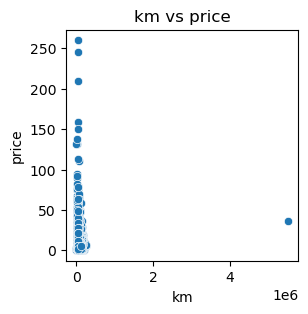

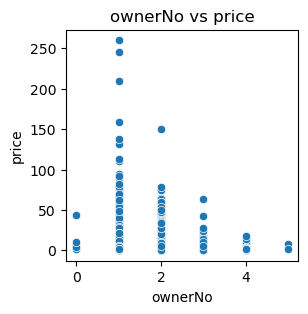

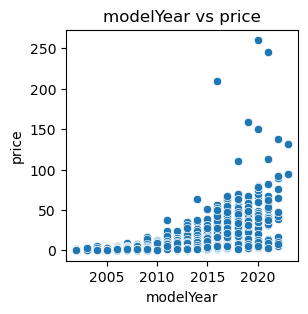

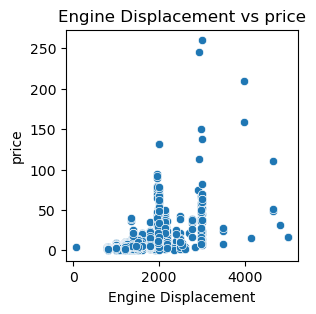

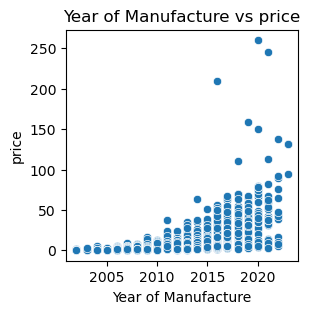

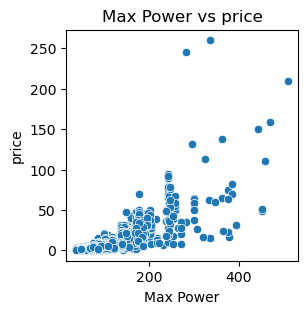

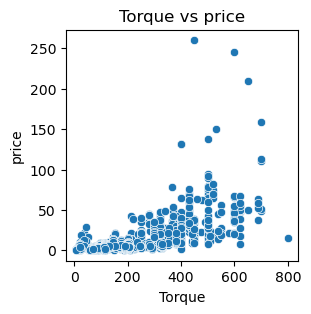

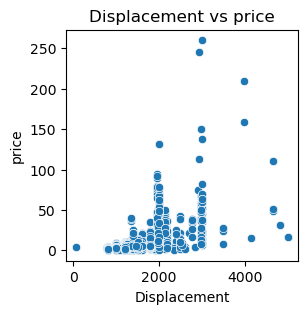

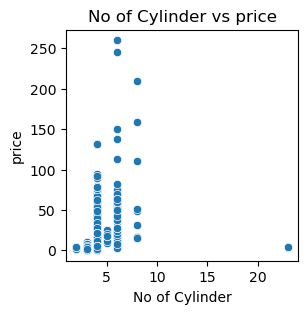

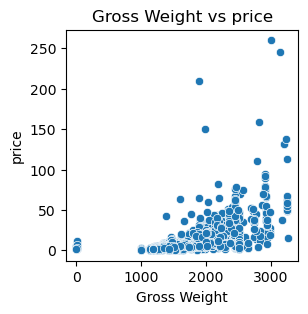

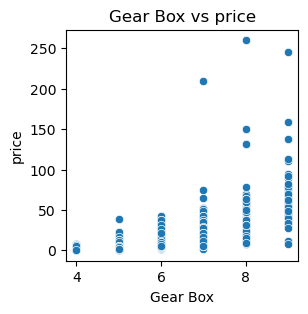

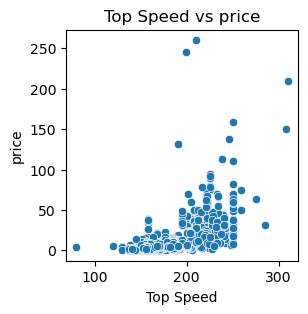

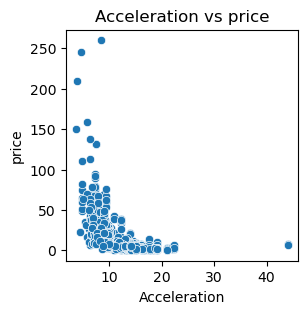

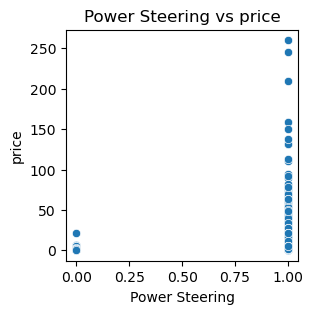

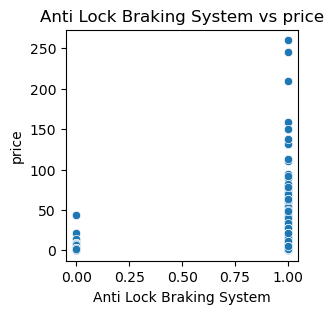

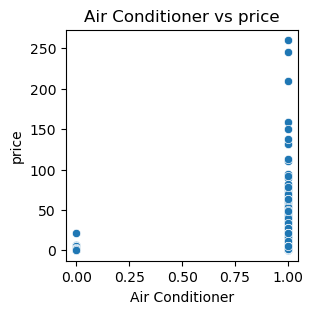

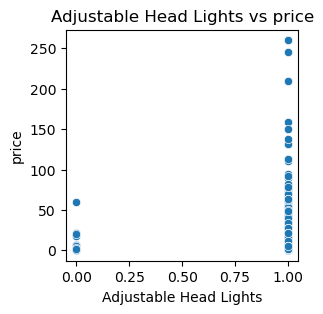

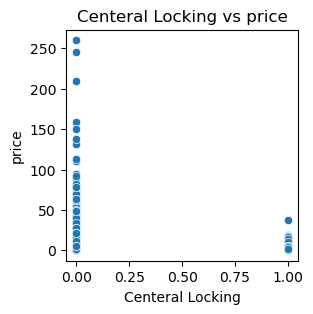

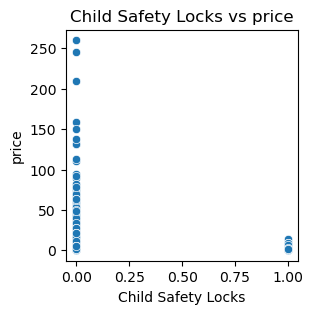

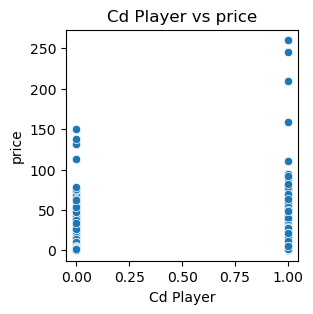

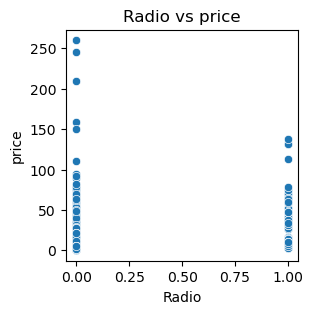

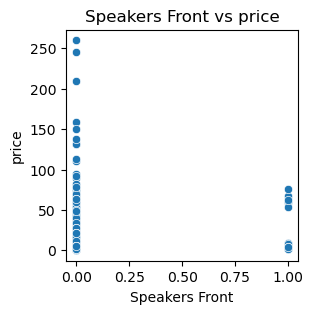

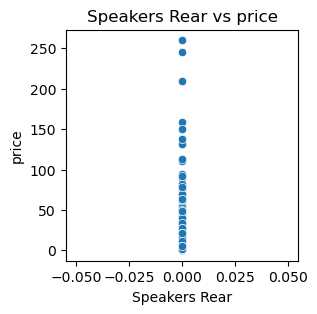

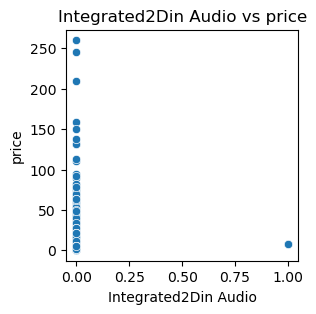

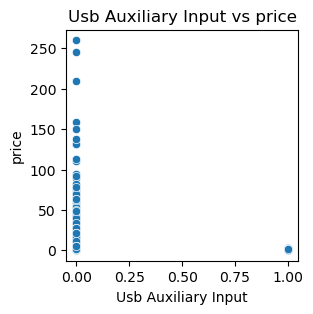

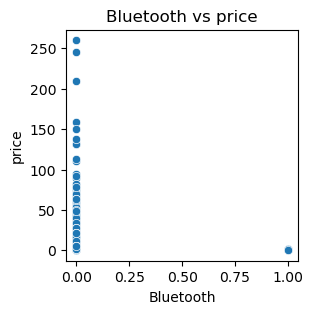

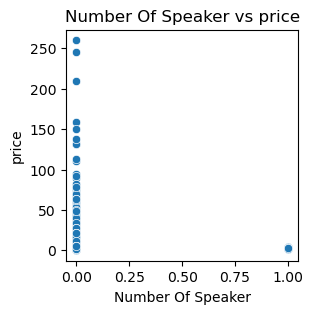

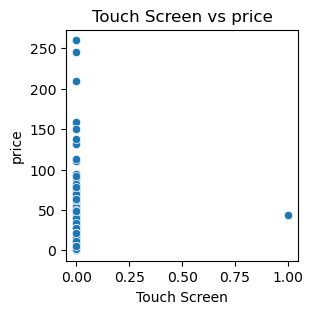

In [259]:
#Finding relation between columns
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Get numerical columns
numerical_cols = final_df.select_dtypes(include=['number']).columns
print(numerical_cols)
final_df=final_df[(final_df["modelYear"]>=1980) & (final_df['modelYear']<=2023)]
# Remove the target column from the numerical columns list if it's present
if target_column in numerical_cols:
    numerical_cols = numerical_cols.drop(target_column)

# Plot scatter plots of numerical features against the target column
for col in numerical_cols:
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x=final_df[col], y=final_df[target_column])
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.show()


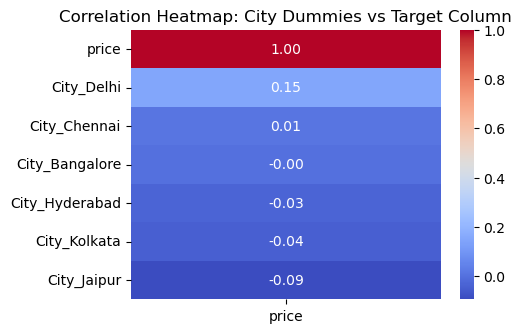

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'City' column
city_dummies = pd.get_dummies(final_df['City'], prefix='City')

# Include the target column in the DataFrame with city dummies
city_dummies[target_column] = final_df[target_column]

# Calculate the correlation matrix for city dummies and the target
correlation_matrix = city_dummies.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: City Dummies vs Target Column')
plt.show()


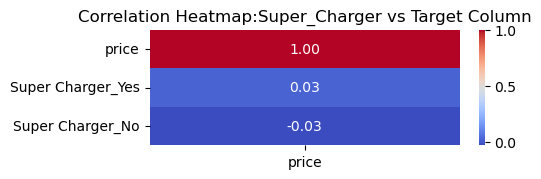

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Super Charger' column
Super_Charger = pd.get_dummies(final_df['Super Charger'], prefix='Super Charger')

# Include the target column in the DataFrame with Super_Charger
Super_Charger[target_column] = final_df[target_column]

# Calculate the correlation matrix for Super_Charger and the target
correlation_matrix = Super_Charger.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap:Super_Charger vs Target Column')
plt.show()


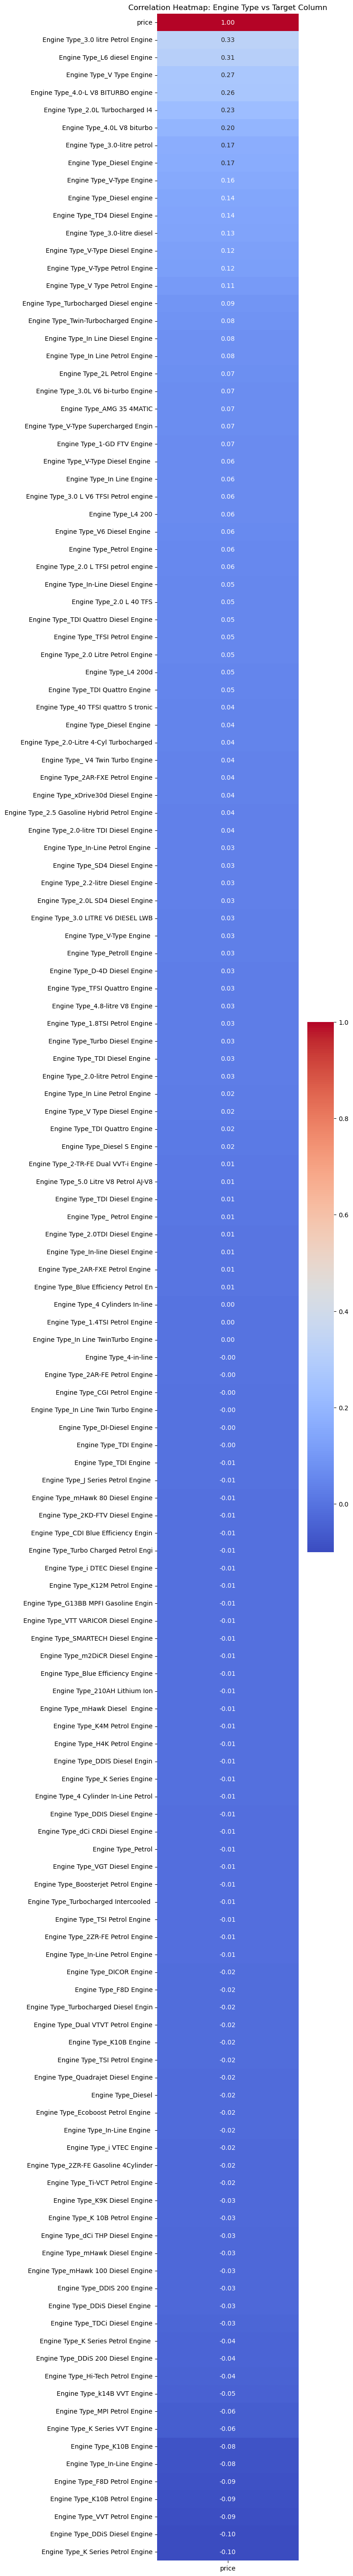

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Engine Type' column
engine_Type = pd.get_dummies(final_df['Engine Type'], prefix='Engine Type')

# Include the target column in the DataFrame with Engine Type
engine_Type[target_column] = final_df[target_column]

# Calculate the correlation matrix for Engine Type and the target
correlation_matrix = engine_Type.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Engine Type vs Target Column')
plt.show()


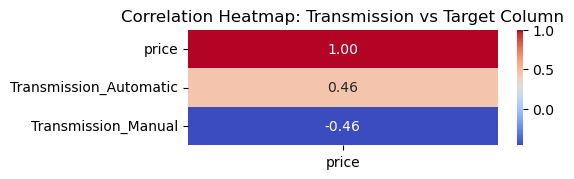

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Transmission' column
transmission = pd.get_dummies(final_df['Transmission'], prefix='Transmission')

# Include the target column in the DataFrame with Transmission
transmission[target_column] = final_df[target_column]

# Calculate the correlation matrix for Transmission and the target
correlation_matrix = transmission.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Transmission vs Target Column')
plt.show()


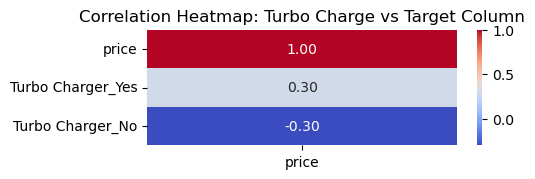

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Turbo Charge' column
turbo_Charge = pd.get_dummies(final_df['Turbo Charger'], prefix='Turbo Charger')

# Include the target column in the DataFrame with city dummies
turbo_Charge[target_column] = final_df[target_column]

# Calculate the correlation matrix for turbo Charge and the target
correlation_matrix = turbo_Charge.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Turbo Charge vs Target Column')
plt.show()


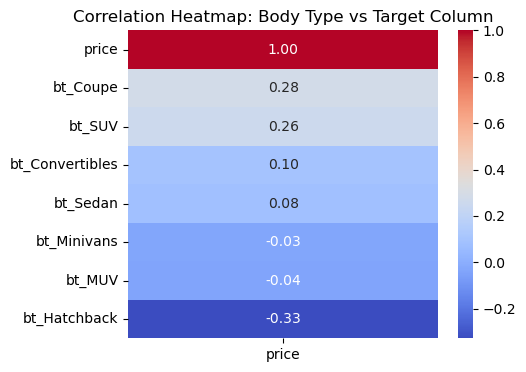

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Body Type' column
body_type = pd.get_dummies(final_df['bt'], prefix='bt')

# Include the target column in the DataFrame with body_type
body_type[target_column] = final_df[target_column]

# Calculate the correlation matrix for city dummies and the target
correlation_matrix = body_type.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)
# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Body Type vs Target Column')
plt.show()


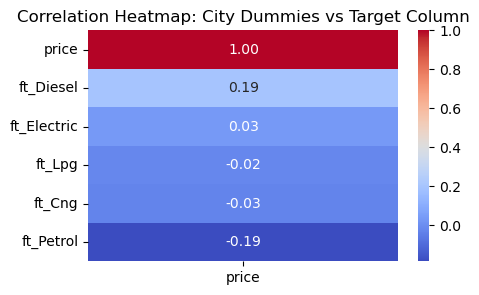

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Fuel Type' column
fuel_type = pd.get_dummies(final_df['ft'], prefix='ft')

# Include the target column in the DataFrame with Fuel type
fuel_type[target_column] = final_df[target_column]

# Calculate the correlation matrix for Fuel type and the target
correlation_matrix = fuel_typeype.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Fuel type vs Target Column')
plt.show()


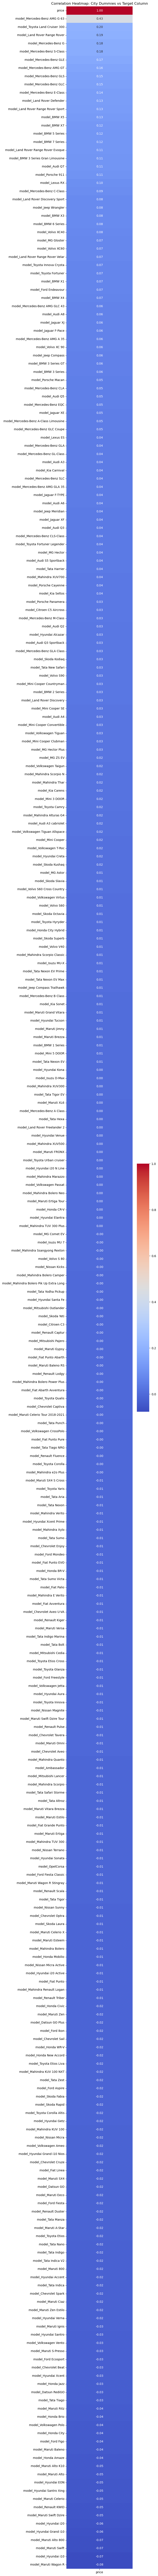

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'Model' column
Model = pd.get_dummies(final_df['model'], prefix='model')

# Include the target column in the DataFrame with Model
city_dummies[target_column] = final_df[target_column]

# Calculate the correlation matrix for Model and the target
correlation_matrix = city_dummies.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Model vs Target Column')
plt.show()


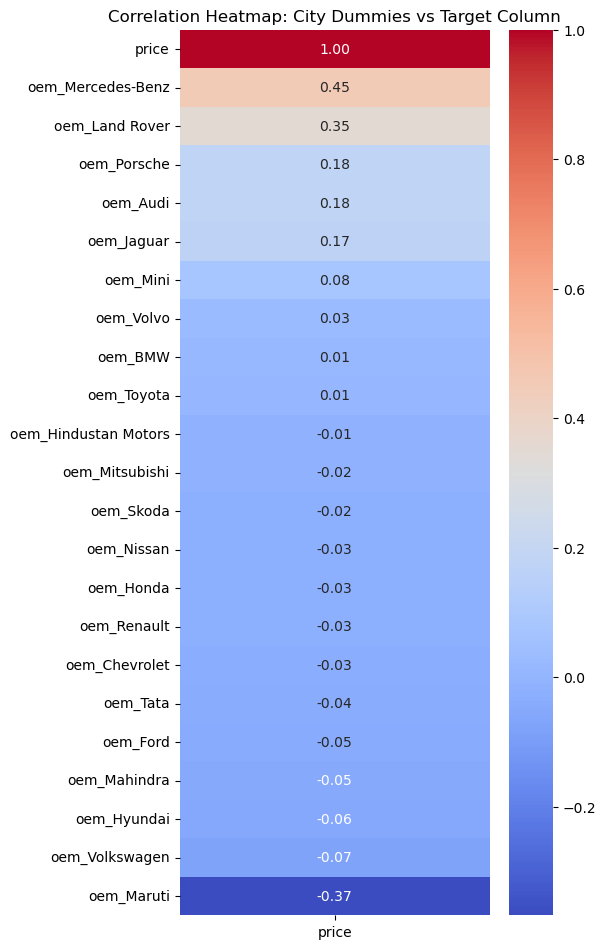

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_df=pd.read_excel(r"C:\Users\Priyanka\OneDrive\Desktop\practice\CarDekho\after_null.xlsx")
# Define the target column
target_column = 'price'  # Replace with your actual target column name

# Apply one-hot encoding to the 'oem' column
oem = pd.get_dummies(final_df['oem'], prefix='oem')

# Include the target column in the DataFrame with city dummies
oem[target_column] = final_df[target_column]

# Calculate the correlation matrix for oem and the target
correlation_matrix = oem.corr()

# Select correlations with the target column
target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, len(target_correlation) * 0.5))  # Adjust height based on the number of cities
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: City Dummies vs Target Column')
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1)# x includes all features except the target variable 'price'
y=after_null["price"]# y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# Initializing the Linear Regression model
model=LinearRegression()
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train)
# Making predictions on the test data
test_pred=model.predict(x_test)
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:6.18983913459079,Testing:5.35913397506152
Mean Absolute error:Training:1.4075336162257819,Testing:1.372310460673106
R squared error:Training:0.8251408536968293,Testing:0.801505746214164


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1) # x includes all features except the target variable 'price'
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
# Initializing the KNeighbors Regression model
model=KNeighborsRegressor(n_neighbors=2)
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train) 
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:1.4077913135361508,Testing:3.4186912854963736
Mean Absolute error:Training:0.6703958548233047,Testing:1.150553435114504
R squared error:Training:0.9590488401705457,Testing:0.889659850412471


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1)# x includes all features except the target variable 'price' 
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
# Initializing the Decision Tree Regression model
model=DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_split=10) 
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train) 
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:4.334818634824502,Testing:9.850275146226696
Mean Absolute error:Training:1.3764439669417754,Testing:1.5615605204089418
R squared error:Training:0.8680819483783134,Testing:0.7349778622580347


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1) # x includes all features except the target variable 'price'
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
# Initializing the Random Forest Regression model
model=RandomForestRegressor(random_state=42) 
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train)
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:0.4313436834331979,Testing:4.680875953698918
Mean Absolute error:Training:0.34187830826852234,Testing:1.0961843508905857
R squared error:Training:0.987035418309213,Testing:0.8679664372574523


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1) # x includes all features except the target variable 'price'
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
# Initializing the Gradient Boosting Regression model
model=GradientBoostingRegressor(random_state=42,n_estimators=150,max_depth=4,min_samples_split=5) 
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train)
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:0.338712713269468,Testing:3.4158908821018406
Mean Absolute error:Training:0.42875351618521584,Testing:0.8703170047562282
R squared error:Training:0.9896922282203365,Testing:0.908095287651462


In [100]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1) # x includes all features except the target variable 'price'
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
# Initializing the Lasso model
model=Lasso()
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train)
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")

Mean squared error:Training:18.347005721668314,Testing:21.687133825617583
Mean Absolute error:Training:2.274997089032821,Testing:2.3904868970090853
R squared error:Training:0.44609987471878176,Testing:0.3974402190935664


In [125]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Splitting features (x) and target variable (y)
x=after_null.drop(["price"],axis=1)# x includes all features except the target variable 'price' 
y=after_null["price"] # y is the target variable 'price'
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
# Initializing the Ridge model
model=Ridge(alpha=1.0)
# Fitting the model to the training data (x_train, y_train)
model.fit(x_train,y_train) 
# Making predictions on the training data
train_pred=model.predict(x_train) 
# Making predictions on the test data
test_pred=model.predict(x_test) 
# Calculating the mean squared error for both the training and test sets
print(f"Mean squared error:Training:{mean_squared_error(y_train,train_pred)},Testing:{mean_squared_error(y_test,test_pred)}")
# Calculating the mean absolute error for both the training and test sets
print(f"Mean Absolute error:Training:{mean_absolute_error(y_train,train_pred)},Testing:{mean_absolute_error(y_test,test_pred)}")
# Calculating the R-squared score (coefficient of determination) for both training and test sets
print(f"R squared error:Training:{r2_score(y_train,train_pred)},Testing:{r2_score(y_test,test_pred)}")


Mean squared error:Training:5.243678213388769,Testing:7.631823183208895
Mean Absolute error:Training:1.3809299908540436,Testing:1.455578408948183
R squared error:Training:0.8404233552739311,Testing:0.7946654215382499


In [10]:
!pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
